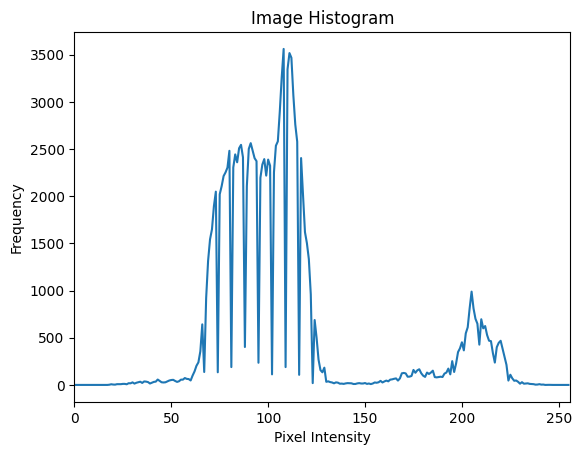

Two intensity clusters: [ 96.45497189 198.09913983]


In [3]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for plotting
import numpy as np
from sklearn.cluster import KMeans

# 1. Load the Image
image = cv2.imread("/home/jinesh14/CourseWork/VR/output1a/grayscale.png", cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# 2. Calculate the Histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 3. Plot the Histogram
plt.plot(hist)
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Image Histogram")
plt.show()

# 4. Function to Find Two Clusters of Pixel Intensities
def find_intensity_clusters(image, n_clusters=2):
    # Reshape image into a 1D array of pixel intensities
    image = cv2.GaussianBlur(image, (13,13), 2)
    pixels = image.reshape(-1, 1)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(pixels)

    # Get the cluster centers (intensity values)
    cluster_centers = kmeans.cluster_centers_.flatten()
    cluster_centers = np.sort(cluster_centers)  # Sort the intensities

    return cluster_centers

# 5. Find the Two Clusters
clusters = find_intensity_clusters(image)
print(f"Two intensity clusters: {clusters}")
